<a href="https://colab.research.google.com/github/HasanZeynal/Resampling-Techniques-For-Imbalance-Problems/blob/main/credit_risk_modelling/01%20-%20credit_risk_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,roc_auc_score,classification_report,roc_curve,f1_score,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/credit_sample.csv')
df

,ID,obs_date,Var_01,Var_02,Var_03,Var_04,Var_05,Var_06,Var_07,Var_08,...,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,default
0,16680574,2015-03-31,1.113874e+07,1.376687e+07,5.088808e+04,1.381694,1.480514,7.173578e+05,0.080700,1.261532e+06,...,1.781196,4.413310e+06,1.830489,1.703930e+06,0.742622,6.391379e+06,3.229780,2.983519e+06,3.077087e+06,0
1,96135545,2015-12-31,3.162025e+10,5.264251e+10,1.191007e+10,1.349057,-0.240472,1.696850e+09,0.463526,2.699133e+10,...,1.175688,-1.129475e+10,-0.225773,2.569705e+10,0.488350,-1.129475e+10,-0.393707,2.825408e+09,8.181468e+09,1
2,96135545,2017-12-31,4.362366e+10,7.431924e+10,1.368830e+10,1.276777,-0.250091,2.310428e+09,0.466883,3.555459e+10,...,1.091261,-1.245830e+10,-0.238898,3.375606e+10,0.513312,-1.245830e+10,-0.329019,4.073381e+09,9.456634e+09,0
3,96135545,2021-12-31,7.415145e+10,1.685034e+11,1.514736e+10,0.860113,0.112167,5.219493e+09,0.459297,5.080364e+10,...,0.723878,7.935362e+09,0.122707,2.388838e+10,0.636282,7.935362e+09,0.141644,7.684133e+09,-1.205984e+10,0
4,96135545,2018-12-31,4.217623e+10,7.909355e+10,1.116617e+10,1.090521,-0.208307,2.802609e+09,0.457592,3.373699e+10,...,1.009588,-1.079843e+10,-0.211018,3.334141e+10,0.532008,-1.079843e+10,-0.295527,4.824058e+09,3.500941e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148924,50036390,2020-12-31,9.856401e+04,1.013964e+05,1.014642e+04,6.425659,0.362302,8.737854e+02,0.131924,6.657380e+04,...,5.042210,2.374815e+04,0.298407,5.555275e+04,0.452123,2.374815e+04,0.352098,4.125691e+03,8.322488e+04,0
148925,15853756,2017-12-31,3.476749e+04,4.989166e+04,2.676141e+04,1.279394,-2.894691,-3.668688e+01,0.215534,6.679014e+04,...,6.207698,-2.676141e+04,-0.334267,7.708415e+03,0.845497,-2.676141e+04,-0.400899,2.377143e+03,7.592517e+03,0
148926,15853756,2016-12-31,9.395386e+03,1.316894e+04,8.052164e+03,0.646936,0.367477,4.352037e+02,0.076480,2.009101e+04,...,20.380253,-8.052164e+03,-0.351285,-1.962178e+04,2.490004,-8.052164e+03,-0.392287,0.000000e+00,-5.127524e+03,0
148927,91988808,2021-06-30,7.853617e+04,3.431528e+06,1.570044e+04,1.323897,-120.526693,NaN,-0.014040,-1.590527e+03,...,0.033013,3.372337e+06,-1199.692943,-1.583171e+04,1.004614,3.372337e+06,-2120.263607,3.529997e+04,1.921420e+04,0


# Data Understanting

In [ ]:
df.isnull().sum()

ID              0
obs_date        0
Var_01        372
Var_02          0
Var_03       4347
Var_04       1224
Var_05       1408
Var_06      12285
Var_07          0
Var_08          0
Var_09          0
Var_10         47
Var_11         15
Var_12         61
Var_13        178
Var_14          0
Var_15          0
Var_16        372
Var_17       2140
Var_18          0
Var_19         15
Var_20      14299
Var_21       1039
Var_22          0
Var_23          0
Var_24          0
Var_25       1224
Var_26       4489
Var_27         54
Var_28       7816
Var_29          0
Var_30         19
Var_31         42
Var_32       1290
Var_33       1326
Var_34         47
Var_35        647
Var_36       1288
Var_37       1324
Var_38      13081
Var_39        283
default         0
dtype: int64

In [ ]:
default_customers = df[df['default'] == 1]
non_default_customers = df[df['default'] == 0]

In [ ]:
default_customers.shape

(8749, 42)

In [ ]:
for i in default_customers.columns:
    print(f'{i} has {default_customers[i].isnull().sum()*100/default_customers.shape[0]} % null values')

ID has 0.0 % null values
obs_date has 0.0 % null values
Var_01 has 0.0 % null values
Var_02 has 0.0 % null values
Var_03 has 1.977368842153389 % null values
Var_04 has 0.0 % null values
Var_05 has 1.0058292376271574 % null values
Var_06 has 14.127328837581437 % null values
Var_07 has 0.0 % null values
Var_08 has 0.0 % null values
Var_09 has 0.0 % null values
Var_10 has 0.0 % null values
Var_11 has 0.0 % null values
Var_12 has 0.0 % null values
Var_13 has 0.03428963310092582 % null values
Var_14 has 0.0 % null values
Var_15 has 0.0 % null values
Var_16 has 0.0 % null values
Var_17 has 0.8686707052234541 % null values
Var_18 has 0.0 % null values
Var_19 has 0.0 % null values
Var_20 has 11.315578923305521 % null values
Var_21 has 0.0 % null values
Var_22 has 0.0 % null values
Var_23 has 0.0 % null values
Var_24 has 0.0 % null values
Var_25 has 0.0 % null values
Var_26 has 2.754600525774374 % null values
Var_27 has 0.0 % null values
Var_28 has 3.726140130300606 % null values
Var_29 has 0.0

In [ ]:
for i in default_customers.columns:
    print(f'{i} has {non_default_customers[i].isnull().sum()*100/non_default_customers.shape[0]} % null values')

ID has 0.0 % null values
obs_date has 0.0 % null values
Var_01 has 0.2653730917391925 % null values
Var_02 has 0.0 % null values
Var_03 has 2.9776002282779284 % null values
Var_04 has 0.8731630760450849 % null values
Var_05 has 0.9416464545584249 % null values
Var_06 has 7.882008845769724 % null values
Var_07 has 0.0 % null values
Var_08 has 0.0 % null values
Var_09 has 0.0 % null values
Var_10 has 0.03352832073048937 % null values
Var_11 has 0.010700527892709373 % null values
Var_12 has 0.04351548009701812 % null values
Var_13 has 0.12483949208160935 % null values
Var_14 has 0.0 % null values
Var_15 has 0.0 % null values
Var_16 has 0.2653730917391925 % null values
Var_17 has 1.4723926380368098 % null values
Var_18 has 0.0 % null values
Var_19 has 0.010700527892709373 % null values
Var_20 has 9.494221714937938 % null values
Var_21 has 0.7411898987016693 % null values
Var_22 has 0.0 % null values
Var_23 has 0.0 % null values
Var_24 has 0.0 % null values
Var_25 has 0.8731630760450849 % n

In [ ]:
print('Non defaults:', round(df['default'].value_counts()[0]/len(df) * 100,2 ), '% of dataset')
print('Defaults:', round(df['default'].value_counts()[1]/len(df)*100, 2), '% of dataset')

Non defaults: 94.13 % of dataset
Defaults: 5.87 % of dataset


In [ ]:
df = df.sample(frac = 1)

# amount of fraud classes 492 rows.
default_df = df.loc[df['default'] == 1]
non_default_df = df.loc[df['default'] == 0][0:default_df.shape[0]]

In [ ]:
balanced_df = pd.concat([default_df, non_default_df])

In [ ]:
for i in df.columns:
    if i == 'obs_date':
        continue
    print(df[i].skew())

-0.01961276788565794
232.51019678559913
231.2235972617896
217.61998924112194
274.4987801618474
-280.2278309279066
90.0118337770456
246.08340011427669
234.83483183610127
233.59688115412445
228.07781041183912
231.22268373168362
229.0718873698647
-220.10621188893896
234.0878549834378
-104.79141819733314
232.51019678559913
226.53828398785922
231.2235972617896
231.22268373168362
217.77423768240592
238.51641356518388
213.6466262534044
-262.39379195696
235.46551713979176
274.13276111495463
234.24980919361604
180.3195791051418
-352.22090532951603
234.6768111511987
234.66142184900767
175.25028851461516
232.359638240502
-383.352728696895
228.08210140331246
342.4371202415798
232.3573118121835
-381.50132740276166
247.48406842407647
194.90360819414684
3.7530119770402486


In [ ]:
stats.yeojohnson(df[i])[0]

array([-0.        , -0.        , -0.        , ..., -0.        ,
        0.04071973, -0.        ])

In [ ]:
# Define a function to detect and treat outliers in a single column
def treat_outliers(x):
    z = np.abs(stats.zscore(x))
    x[z > 3] = np.nanmedian(x)
    return x

# Apply the function to all columns of the dataframe
df_outlier_treated = df.drop(['ID', 'obs_date'], axis = 1).apply(lambda x: treat_outliers(x))

In [ ]:
df_outlier_treated['Var_01'].max()

5995097491425831.0

In [ ]:
df = df.dropna()

In [ ]:
df.drop('obs_date',axis=1,inplace=True)

# Visualizations

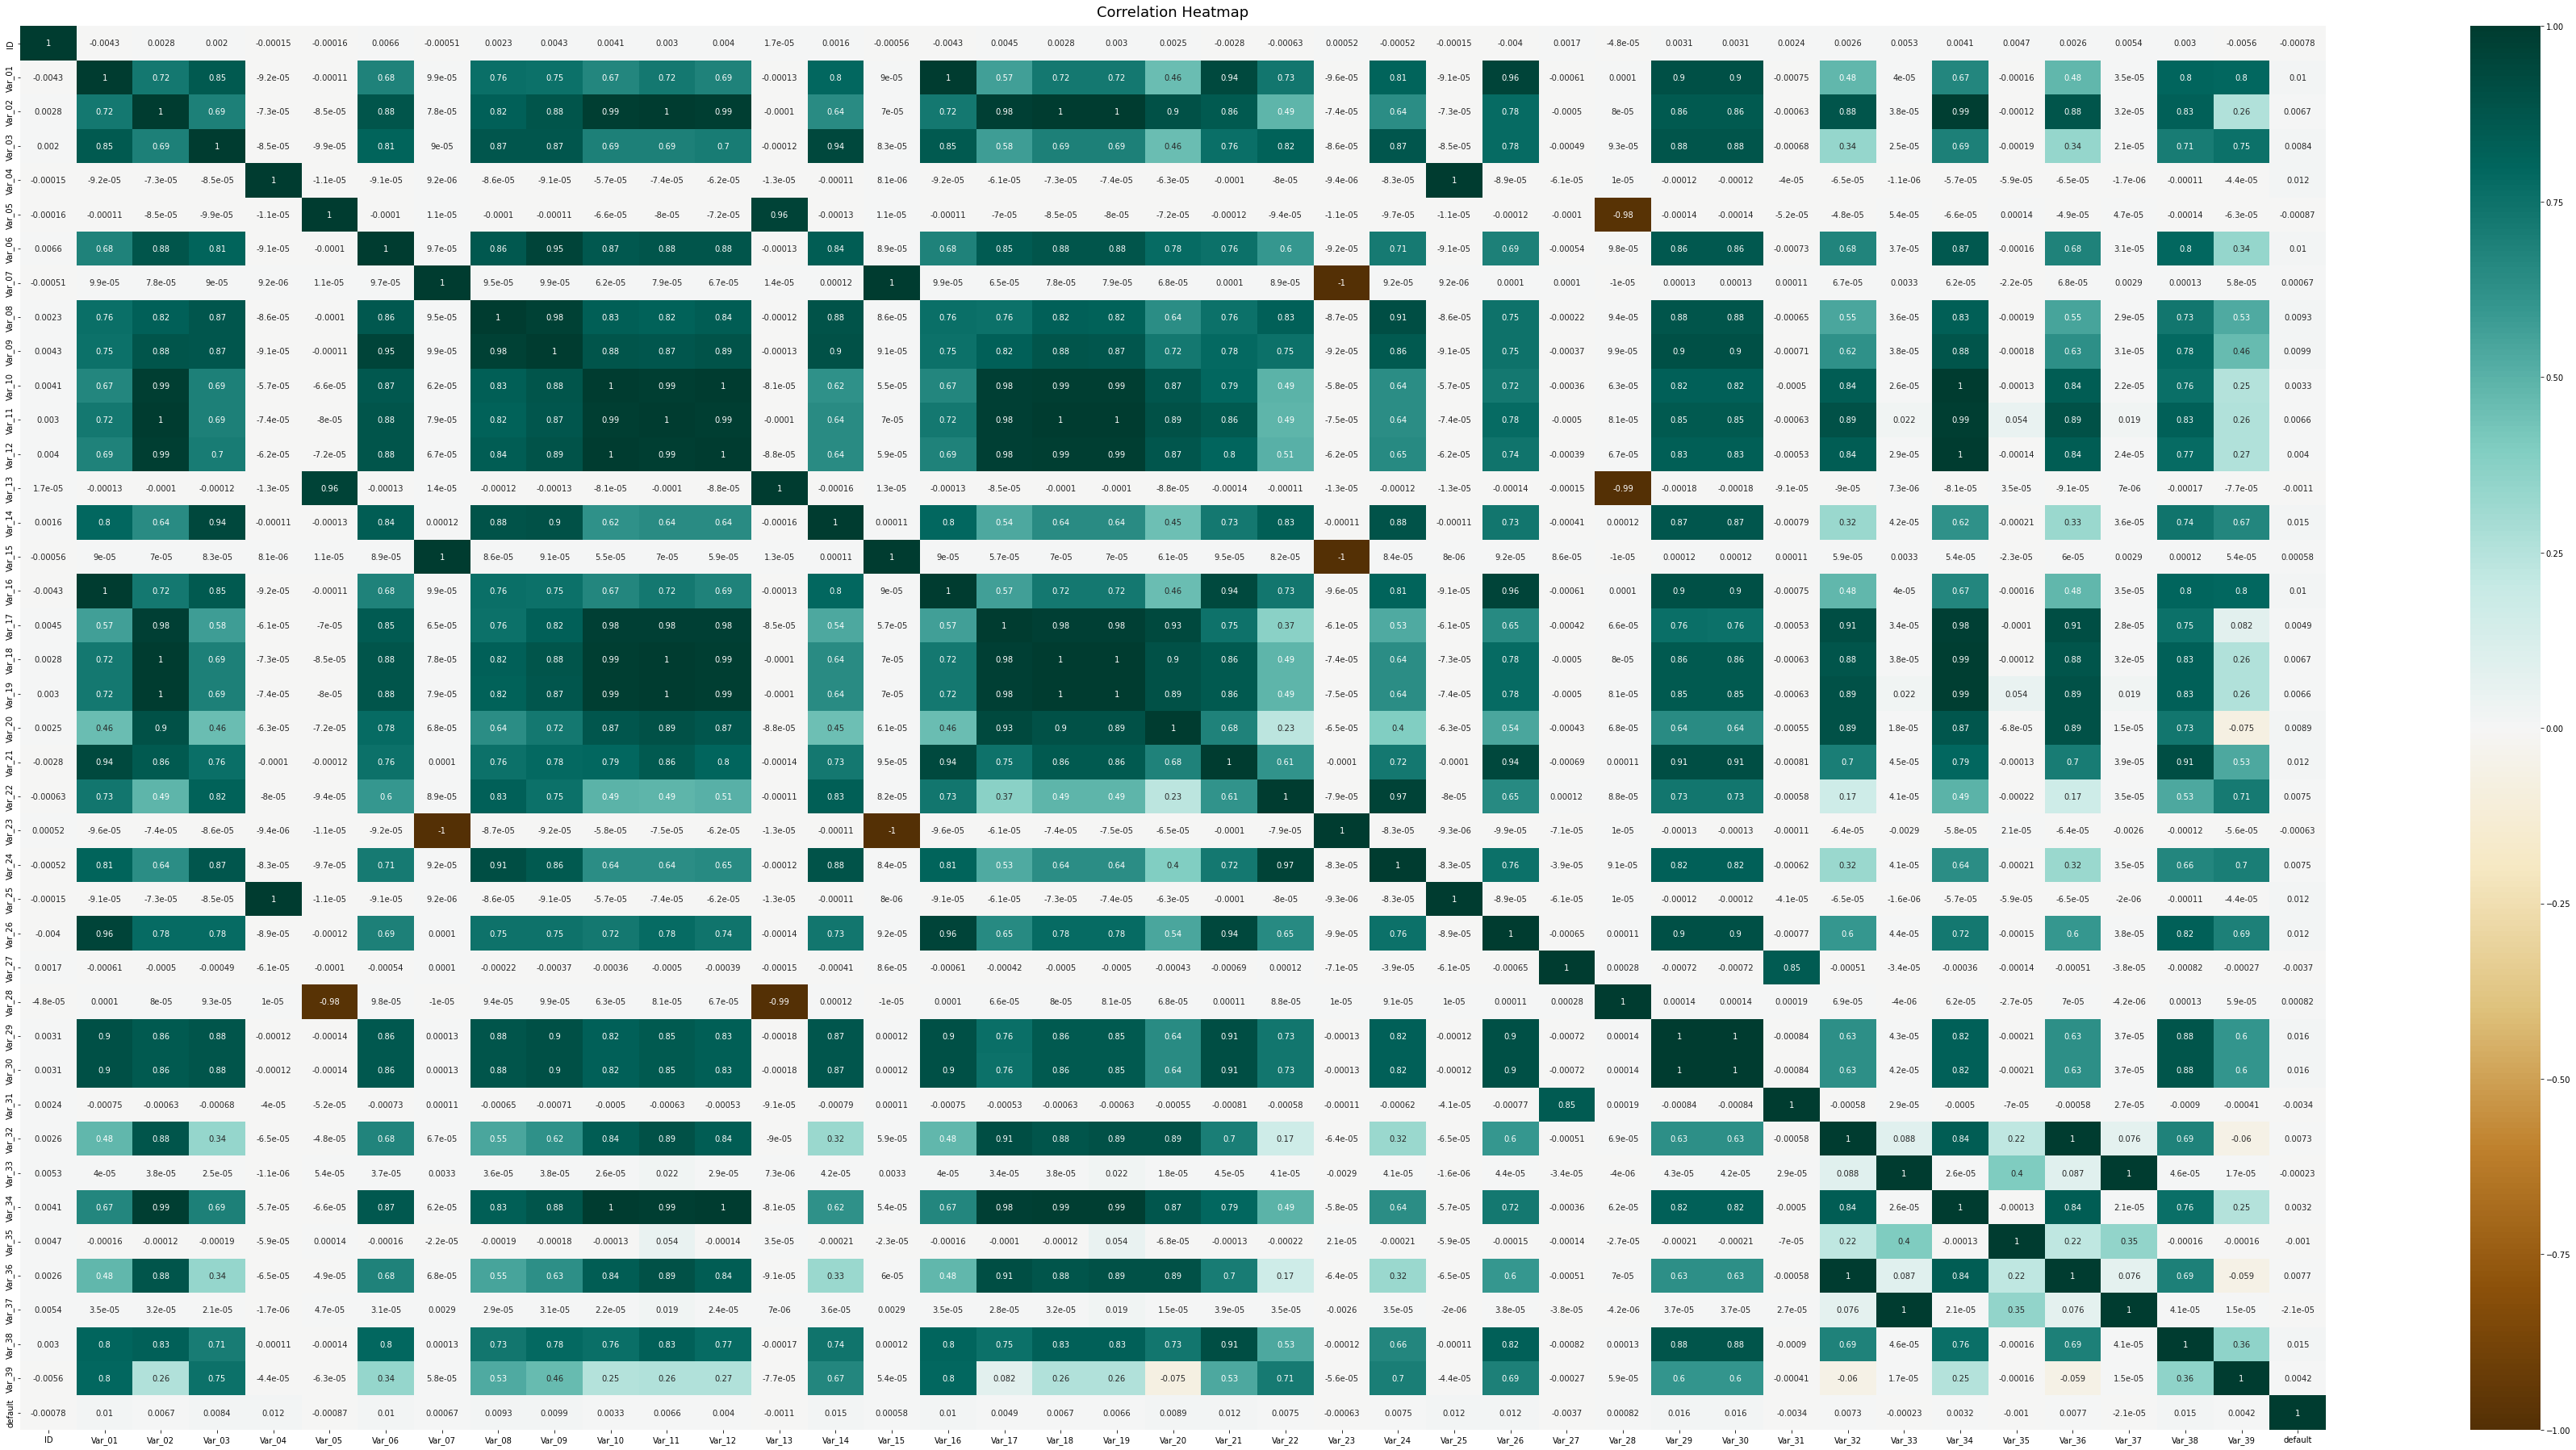

In [ ]:
plt.figure(figsize=(64, 32))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# Modelling

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
#train test splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#preparing for modelling
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()
def print_evaluate(true, predicted):  
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    #roc_auc = roc_auc_score(true,predicted)
    report = classification_report(true, predicted)
    print('Accuracy Score:', round(accuracy,2))
    print('Precision Score:', round(precision,2))
    print('Recall Score:', round(recall,2))
    print('F1 Score:', round(f1,2))
    #print('Roc Auc Score:', round(roc_auc,2))
    print('----------------------------------')
    print('Classification report:\n',report)
def evaluate(true, predicted):  
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    #roc_auc = roc_auc_score(true,predicted)
    #report = classification_report(true, predicted)
    
    return accuracy,precision,recall,f1_score
def roc_curve(true,predicted):
    return roc_curve(true,predicted)

### Logistic Regression

In [ ]:
log_model = LogisticRegression(penalty='l2')
log_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
log_predict = log_model.predict(X_test)
print_evaluate(log_predict,y_test)

Accuracy Score: 0.94
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
----------------------------------
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     21742
           1       0.00      0.00      0.00         0

    accuracy                           0.94     21742
   macro avg       0.50      0.47      0.49     21742
weighted avg       1.00      0.94      0.97     21742



In [ ]:
results_df = pd.DataFrame(data=[["Logistic Regression", *evaluate(y_test, log_predict),cross_val(log_model)]], 
                            columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score','Cross Validation'])

### Naive Bayes Classifier

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [ ]:
naive_predict = naive_bayes.predict(X_test)
print_evaluate(naive_predict,y_test)

Accuracy Score: 0.06
Precision Score: 0.99
Recall Score: 0.06
F1 Score: 0.11
----------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.82      0.01        98
           1       0.99      0.06      0.11     21644

    accuracy                           0.06     21742
   macro avg       0.49      0.44      0.06     21742
weighted avg       0.98      0.06      0.11     21742



In [ ]:
naive_df = pd.DataFrame(data=[["Naive Bayes", *evaluate(y_test, log_predict),cross_val(naive_bayes)]], 
                            columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score','Cross Validation'])
results_df = results_df.append(naive_df,ignore_index=True)

### Decision tree

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
tree_predict = tree.predict(X_test)
print_evaluate(tree_predict,y_test)

Accuracy Score: 0.91
Precision Score: 0.24
Recall Score: 0.21
F1 Score: 0.22
----------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     20346
           1       0.24      0.21      0.22      1396

    accuracy                           0.91     21742
   macro avg       0.59      0.58      0.58     21742
weighted avg       0.90      0.91      0.90     21742



In [ ]:
tree_df = pd.DataFrame(data=[["Decision Tree", *evaluate(y_test, log_predict),cross_val(tree)]], 
                            columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score','Cross Validation'])
results_df = results_df.append(tree_df,ignore_index=True)

### Random Forest Classifier

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
random_predict = tree.predict(X_test)
print_evaluate(random_predict,y_test)

Accuracy Score: 0.91
Precision Score: 0.24
Recall Score: 0.21
F1 Score: 0.22
----------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     20346
           1       0.24      0.21      0.22      1396

    accuracy                           0.91     21742
   macro avg       0.59      0.58      0.58     21742
weighted avg       0.90      0.91      0.90     21742



In [ ]:
random_df = pd.DataFrame(data=[["Random Forest Classifier", *evaluate(y_test, log_predict),cross_val(random_forest)]], 
                            columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score','Cross Validation'])
results_df = results_df.append(random_df,ignore_index=True)

### XGBoost Classifier

In [ ]:
xg_boost = XGBClassifier()
xg_boost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
random_predict = tree.predict(X_test)
print_evaluate(random_predict,y_test)

Accuracy Score: 0.91
Precision Score: 0.24
Recall Score: 0.21
F1 Score: 0.22
----------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     20346
           1       0.24      0.21      0.22      1396

    accuracy                           0.91     21742
   macro avg       0.59      0.58      0.58     21742
weighted avg       0.90      0.91      0.90     21742



In [ ]:
xg_df = pd.DataFrame(data=[["XGBoost", *evaluate(y_test, log_predict),cross_val(xg_boost)]], 
                            columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score','Cross Validation'])
results_df = results_df.append(xg_df,ignore_index=True)

### CatBoost

In [ ]:
cat_boost = CatBoostClassifier()
cat_boost.fit(X_train,y_train)

Learning rate set to 0.069348
0:	learn: 0.5376622	total: 86.8ms	remaining: 1m 26s
1:	learn: 0.4192215	total: 116ms	remaining: 57.9s
2:	learn: 0.3461476	total: 147ms	remaining: 49s
3:	learn: 0.2905530	total: 177ms	remaining: 44.1s
4:	learn: 0.2571254	total: 208ms	remaining: 41.3s
5:	learn: 0.2345958	total: 239ms	remaining: 39.6s
6:	learn: 0.2184093	total: 273ms	remaining: 38.7s
7:	learn: 0.2058456	total: 308ms	remaining: 38.2s
8:	learn: 0.1973074	total: 350ms	remaining: 38.5s
9:	learn: 0.1898446	total: 383ms	remaining: 37.9s
10:	learn: 0.1844243	total: 419ms	remaining: 37.7s
11:	learn: 0.1802647	total: 465ms	remaining: 38.3s
12:	learn: 0.1763687	total: 495ms	remaining: 37.6s
13:	learn: 0.1732559	total: 526ms	remaining: 37s
14:	learn: 0.1705337	total: 555ms	remaining: 36.4s
15:	learn: 0.1683696	total: 583ms	remaining: 35.9s
16:	learn: 0.1664119	total: 616ms	remaining: 35.6s
17:	learn: 0.1648509	total: 650ms	remaining: 35.5s
18:	learn: 0.1635181	total: 689ms	remaining: 35.6s
19:	learn: 0.

In [ ]:
cat_predict = cat_boost.predict(X_test)
print_evaluate(cat_predict,y_test)

Accuracy Score: 0.94
Precision Score: 0.04
Recall Score: 0.43
F1 Score: 0.08
----------------------------------
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     21622
           1       0.04      0.43      0.08       120

    accuracy                           0.94     21742
   macro avg       0.52      0.69      0.52     21742
weighted avg       0.99      0.94      0.97     21742



In [ ]:
cat_df = pd.DataFrame(data=[["Cat Boost", *evaluate(y_test, log_predict),cross_val(cat_boost)]], 
                            columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score','Cross Validation'])
results_df = results_df.append(cat_df,ignore_index=True)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.2495693	total: 435ms	remaining: 1m 26s
5:	learn: 0.2280560	total: 528ms	remaining: 1m 27s
6:	learn: 0.2127558	total: 611ms	remaining: 1m 26s
7:	learn: 0.2009551	total: 687ms	remaining: 1m 25s
8:	learn: 0.1929561	total: 776ms	remaining: 1m 25s
9:	learn: 0.1859709	total: 862ms	remaining: 1m 25s
10:	learn: 0.1805034	total: 926ms	remaining: 1m 23s
11:	learn: 0.1767191	total: 1.01s	remaining: 1m 23s
12:	learn: 0.1730756	total: 1.08s	remaining: 1m 22s
13:	learn: 0.1702427	total: 1.12s	remaining: 1m 18s
14:	learn: 0.1679309	total: 1.16s	remaining: 1m 16s
15:	learn: 0.1659643	total: 1.19s	remaining: 1m 13s
16:	learn: 0.1643672	total: 1.23s	remaining: 1m 11s
17:	learn: 0.1629377	total: 1.27s	remaining: 1m 9s
18:	learn: 0.1617595	total: 1.3s	remaining: 1m 7s
19:	learn: 0.1606772	total: 1.34s	remaining: 1m 5s
20:	learn: 0.1598055	total: 1.37s	remaining: 1m 3s
21:	learn: 0.1590291	total: 1.41s	remaining: 1m 2s
22:	learn: 0.1583879	tota

### AdaBoost

In [ ]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
ada_predict = tree.predict(X_test)
print_evaluate(ada_predict,y_test)

Accuracy Score: 0.91
Precision Score: 0.24
Recall Score: 0.21
F1 Score: 0.22
----------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     20346
           1       0.24      0.21      0.22      1396

    accuracy                           0.91     21742
   macro avg       0.59      0.58      0.58     21742
weighted avg       0.90      0.91      0.90     21742



In [ ]:
ada_df = pd.DataFrame(data=[["Ada Boost", *evaluate(y_test, log_predict),cross_val(ada_boost)]], 
                            columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score','Cross Validation'])
results_df = results_df.append(ada_df,ignore_index=True)

## Bagging Classifier

In [ ]:
bagging = BaggingClassifier()
bagging.fit(X_train,y_train)

BaggingClassifier()

In [ ]:
bagging_predict = tree.predict(X_test)
print_evaluate(bagging_predict,y_test)

Accuracy Score: 0.91
Precision Score: 0.24
Recall Score: 0.21
F1 Score: 0.22
----------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     20346
           1       0.24      0.21      0.22      1396

    accuracy                           0.91     21742
   macro avg       0.59      0.58      0.58     21742
weighted avg       0.90      0.91      0.90     21742



In [ ]:
bagging_df = pd.DataFrame(data=[["BaggingClassifier", *evaluate(y_test, log_predict),cross_val(bagging)]], 
                            columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score','Cross Validation'])
results_df = results_df.append(bagging_df,ignore_index=True)

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,Cross Validation
0,Logistic Regression,0.943703,0.0,0.0,<function f1_score at 0x7f92548b7b80>,0.941899
1,Naive Bayes,0.943703,0.0,0.0,<function f1_score at 0x7f92548b7b80>,0.061007
2,Decision Tree,0.943703,0.0,0.0,<function f1_score at 0x7f92548b7b80>,0.903944
3,Random Forest Classifier,0.943703,0.0,0.0,<function f1_score at 0x7f92548b7b80>,0.940823
4,XGBoost,0.943703,0.0,0.0,<function f1_score at 0x7f92548b7b80>,0.940124
5,Cat Boost,0.943703,0.0,0.0,<function f1_score at 0x7f92548b7b80>,0.940989
6,Ada Boost,0.943703,0.0,0.0,<function f1_score at 0x7f92548b7b80>,0.941697
7,BaggingClassifier,0.943703,0.0,0.0,<function f1_score at 0x7f92548b7b80>,0.937199


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

randomized_xgb = XGBClassifier()
parameters = {
             'learning_rate':[0.01,0.05,0.1,0.15,0.2,0.25,0.3],
             'max_depth':[2,3,4,6,8,10,12],
             'min_child_weight':[1,2,3,5,6,7,9],
             'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7],
             'colsample_bytree':[0.2,0.3,0.5,0.6,0.7,0.8,0.9]
             }
random_search = RandomizedSearchCV(estimator=randomized_xgb,
                                   param_distributions=parameters
                                   #random_state=42,
                                   #verbose=3,
                                   #n_iter=-1,
                                   #cv=5
                          )

In [ ]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.2, 0.3, 0.5, 0.6,
                                                             0.7, 0.8, 0.9],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2, 0.25, 0.3],
                                        'max_depth': [2, 3, 4, 6, 8, 10, 12],
                                        'min_child_weight': [1, 2, 3, 5, 6, 7,
                                                             9]})

In [ ]:
random_search.best_params_

{'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.2,
 'gamma': 0.6,
 'colsample_bytree': 0.2}

In [ ]:
random_search.best_score_

0.9415403748450727

# Undersampling methods to deal with imbalance

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)

0.5592401802962009

In [ ]:
print(f"Classification Report: \n{classification_report(y_test, smote_pred)}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.54      0.70     20518
           1       0.10      0.82      0.17      1224

    accuracy                           0.56     21742
   macro avg       0.54      0.68      0.44     21742
weighted avg       0.93      0.56      0.67     21742

